Found 434 images belonging to 2 classes.
Found 107 images belonging to 2 classes.
🔢 Class Weights: {0: 1.3072289156626506, 1: 0.8097014925373134}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 965ms/step - accuracy: 0.4673 - loss: 0.9007 - val_accuracy: 0.6916 - val_loss: 0.5868
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.6261 - loss: 0.6687 - val_accuracy: 0.6916 - val_loss: 0.5336
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 468ms/step - accuracy: 0.7203 - loss: 0.5248 - val_accuracy: 0.7944 - val_loss: 0.4508
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 481ms/step - accuracy: 0.7389 - loss: 0.4906 - val_accuracy: 0.8411 - val_loss: 0.4067
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.8091 - loss: 0.4686 - val_accuracy: 0.8037 - val_loss: 0.4359
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - accuracy: 0.8195 - loss: 0.3736 - val_accuracy: 0.8879 - val_loss: 0.3484
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 462ms/step - accuracy: 0.8419 - loss: 0.3554 - val_accuracy: 0.8318 - val_loss: 0.4063
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 472ms/step - accuracy: 0.7996 - loss: 0.3808 - val_accuracy: 0

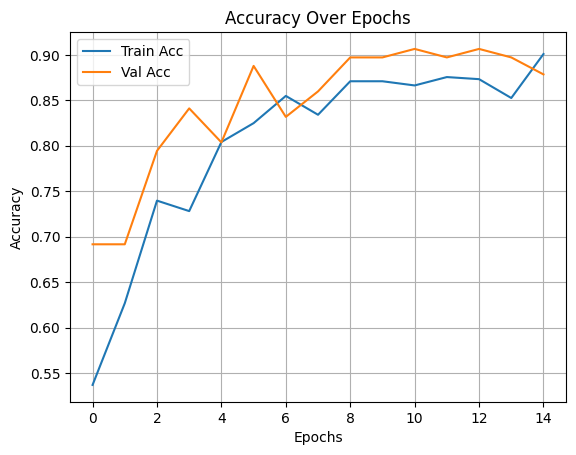

✅ Model saved as 'railway_gate_classifier1.h5'


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# 1. CONFIG
DATA_DIR = "/kaggle/input/classification-dataset/classification_dataset"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

# 2. AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# 3. COMPUTE CLASS WEIGHTS
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("🔢 Class Weights:", class_weights_dict)

# 4. BUILD MODEL
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

# 5. COMPILE
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. TRAIN
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    class_weight=class_weights_dict
)

# 7. EVALUATE
val_generator.reset()
preds = model.predict(val_generator)
y_pred = (preds > 0.5).astype(int)
y_true = val_generator.classes

print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))
print("📉 Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# 8. PLOT
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 9. SAVE MODEL
model.save("railway_gate_classifier.h5")
print("✅ Model saved as 'railway_gate_classifier.h5'")


Found 434 images belonging to 2 classes.
Found 107 images belonging to 2 classes.
🔢 Class Weights: {0: 1.3072289156626506, 1: 0.8097014925373134}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 943ms/step - accuracy: 0.5563 - loss: 0.8300 - val_accuracy: 0.6822 - val_loss: 0.5983 - learning_rate: 0.0010
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 492ms/step - accuracy: 0.6434 - loss: 0.6314 - val_accuracy: 0.7477 - val_loss: 0.4915 - learning_rate: 0.0010
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - accuracy: 0.7526 - loss: 0.5145 - val_accuracy: 0.7196 - val_loss: 0.5133 - learning_rate: 0.0010
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.7822 - loss: 0.4617 - val_accuracy: 0.8411 - val_loss: 0.3961 - learning_rate: 0.0010
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 456ms/step - accuracy: 0.7636 - loss: 0.4646 - val_accuracy: 0.8598 - val_loss: 0.3812 - learning_rate: 0.0010
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 462ms/step - accuracy: 0.7997 - loss: 0.4610 - val_accuracy: 0.7757 - val_loss: 0.4206 - learning_rate: 0.0010
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 500ms/step - accuracy: 0.7914 - loss: 0.4213 -

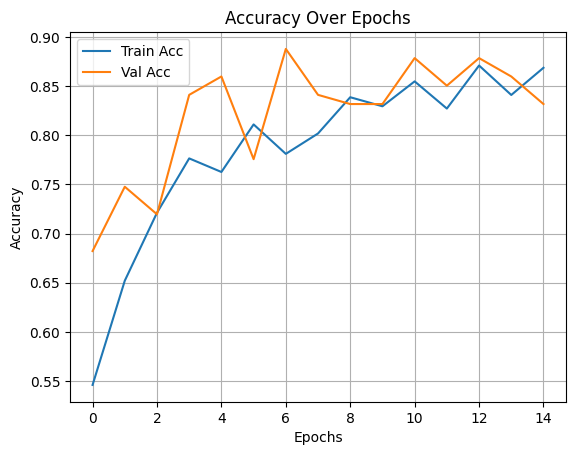

✅ Model saved as 'railway_gate_classifier_final3.h5'


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# 1. CONFIG
DATA_DIR = "/kaggle/input/classification-dataset/classification_dataset"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
MODEL_PATH = "best_railway_gate_classifier.h5"

# 2. AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# 3. COMPUTE CLASS WEIGHTS
labels = np.array(train_generator.classes)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights_dict = dict(zip(np.unique(labels), class_weights))
print("🔢 Class Weights:", class_weights_dict)

# 4. BUILD MODEL
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

# 5. COMPILE
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. CALLBACKS
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    ModelCheckpoint(MODEL_PATH, save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# 7. TRAIN
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

# 8. EVALUATE
val_generator.reset()
preds = model.predict(val_generator)
y_pred = (preds > 0.5).astype(int)
y_true = val_generator.classes

print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))
print("📉 Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# 9. PLOT
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 10. SAVE FINAL MODEL (optional, if best not saved)
model.save("railway_gate_classifier_final3.h5")
print("✅ Model saved as 'railway_gate_classifier_final3.h5'")


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

# 1. Load Model
model_path = "/kaggle/working/railway_gate_classifier_final3.h5"
model = tf.keras.models.load_model(model_path)
print(f"✅ Loaded model from: {model_path}")

# 2. Data Parameters
DATA_DIR = "/kaggle/input/classification-dataset/classification_dataset"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# 3. Create Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# 4. Evaluate on Train and Validation Sets
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
val_loss, val_acc = model.evaluate(val_generator, verbose=0)

print(f"\n📈 Training Accuracy: {train_acc:.4f}")
print(f"📉 Validation Accuracy: {val_acc:.4f}")

# 5. Predict on Validation Set (used as test)
val_generator.reset()
y_probs = model.predict(val_generator)
y_pred = (y_probs > 0.5).astype(int).flatten()
y_true = val_generator.classes

# 6. Compute Evaluation Metrics
overall_acc = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"\n✅ Overall/Test Accuracy: {overall_acc:.4f}")
print(f"🔁 Recall: {recall:.4f}")
print(f"🎯 F1 Score: {f1:.4f}")

# 7. Optional: Classification Report & Confusion Matrix
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

print("📉 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


✅ Loaded model from: /kaggle/working/railway_gate_classifier_final3.h5
Found 434 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📈 Training Accuracy: 0.8779
📉 Validation Accuracy: 0.8785
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step 

✅ Overall/Test Accuracy: 0.8785
🔁 Recall: 0.8333
🎯 F1 Score: 0.8943

📊 Classification Report:
              precision    recall  f1-score   support

Gates Closed       0.78      0.95      0.86        41
Gates Opened       0.96      0.83      0.89        66

    accuracy                           0.88       107
   macro avg       0.87      0.89      0.88       107
weighted avg       0.89      0.88      0.88       107

📉 Confusion Matrix:
[[39  2]
 [11 55]]


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

# 1. Load Model
model_path = "/kaggle/working/railway_gate_classifier1.h5"
model = tf.keras.models.load_model(model_path)
print(f"✅ Loaded model from: {model_path}")

# 2. Data Parameters
DATA_DIR = "/kaggle/input/classification-dataset/classification_dataset"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# 3. Create Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# 4. Evaluate on Train and Validation Sets
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
val_loss, val_acc = model.evaluate(val_generator, verbose=0)

print(f"\n📈 Training Accuracy: {train_acc:.4f}")
print(f"📉 Validation Accuracy: {val_acc:.4f}")

# 5. Predict on Validation Set (used as test)
val_generator.reset()
y_probs = model.predict(val_generator)
y_pred = (y_probs > 0.5).astype(int).flatten()
y_true = val_generator.classes

# 6. Compute Evaluation Metrics
overall_acc = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"\n✅ Overall/Test Accuracy: {overall_acc:.4f}")
print(f"🔁 Recall: {recall:.4f}")
print(f"🎯 F1 Score: {f1:.4f}")

# 7. Optional: Classification Report & Confusion Matrix
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

print("📉 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


✅ Loaded model from: /kaggle/working/railway_gate_classifier1.h5
Found 434 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📈 Training Accuracy: 0.9124
📉 Validation Accuracy: 0.8785
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step 

✅ Overall/Test Accuracy: 0.8785
🔁 Recall: 0.8485
🎯 F1 Score: 0.8960

📊 Classification Report:
              precision    recall  f1-score   support

Gates Closed       0.79      0.93      0.85        41
Gates Opened       0.95      0.85      0.90        66

    accuracy                           0.88       107
   macro avg       0.87      0.89      0.87       107
weighted avg       0.89      0.88      0.88       107

📉 Confusion Matrix:
[[38  3]
 [10 56]]


In [ ]:
# Using YOLO

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing i

In [2]:
import shutil
import os

# Create a writable copy
writable_dataset_path = "/kaggle/working/classification_dataset"
if not os.path.exists(writable_dataset_path):
    shutil.copytree("/kaggle/input/classification-dataset/classification_dataset", writable_dataset_path)


In [3]:
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix
import torch
import numpy as np
import os
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# 1. Train YOLOv8 Classification Model
model = YOLO('yolov8n-cls.pt')  # or yolov8s-cls.pt, yolov8m-cls.pt, etc.

# 2. Train (YOLO handles splitting automatically if `val` folder not specified)
model.train(
    data=writable_dataset_path,  # MUST be writable
    epochs=15,
    imgsz=224,
    project='yolo_cls_project',
    name='railway_classifier',
    pretrained=True,
    patience=5
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 69.4MB/s]


Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/classification_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=railway_classifier, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=Tr

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 692.4±216.6 MB/s, size: 20.8 KB)


train: Scanning /kaggle/working/classification_dataset_split/train... 432 images, 0 corrupt: 100%|██████████| 432/432 [00:00<00:00, 3037.70it/s]

train: New cache created: /kaggle/working/classification_dataset_split/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 519.3±244.3 MB/s, size: 23.9 KB)


val: Scanning /kaggle/working/classification_dataset_split/val... 109 images, 0 corrupt: 100%|██████████| 109/109 [00:00<00:00, 3203.94it/s]

val: New cache created: /kaggle/working/classification_dataset_split/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to yolo_cls_project/railway_classifier
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/15     0.225G     0.7823         16        224:   0%|          | 0/27 [00:00<?, ?it/s]Exception in thread Thread-21 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
       1/15     0.225G     0.7823         16        224:   4%|▎         | 1/27 [00:00<00:18,  1.40it/s]    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
       1/15      0.23G     0.7966         16        224:   4%|▎         | 1/27 [00:00<00:18,  1.40it/s]Exception in thread Thread-22 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
     

                   all      0.752          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 87.42it/s]

                   all      0.899          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 96.59it/s]

                   all      0.945          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 62.23it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 61.85it/s]

                   all      0.945          1



      Epoch    GPU_mem       loss  Instances       Size


       6/15     0.295G    0.05483         16        224:   0%|          | 0/27 [00:00<?, ?it/s]Exception in thread Thread-25 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
       6/15     0.295G    0.05483         16        224:   4%|▎         | 1/27 [00:00<00:04,  6.18it/s]    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
       6/15     0.295G    0.04374         16        224:   4%|▎         | 1/27 [00:00<00:04,  6.18it/s]Exception in thread Thread-26 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
TypeError: plot_images() got an unexpected keyword argument 'batch_idx'
     

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 98.10it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 72.35it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 60.47it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15     0.328G     0.1459         16        224: 100%|██████████| 27/27 [00:01<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 74.18it/s]

                   all      0.945          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15     0.336G     0.0988         16        224: 100%|██████████| 27/27 [00:01<00:00, 19.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 87.33it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15     0.344G    0.07576         16        224: 100%|██████████| 27/27 [00:01<00:00, 18.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 62.06it/s]

                   all      0.954          1
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 7, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



12 epochs completed in 0.006 hours.
Optimizer stripped from yolo_cls_project/railway_classifier/weights/last.pt, 3.0MB
Optimizer stripped from yolo_cls_project/railway_classifier/weights/best.pt, 3.0MB

Validating yolo_cls_project/railway_classifier/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /kaggle/working/classification_dataset/train
Found 541 images in subdirectories. Attempting to split...
Splitting /kaggle/working/classification_dataset (2 classes, 541 images) into 80% train, 20% val...
Split complete in /kaggle/working/classification_dataset_split ✅
train: /kaggle/working/classification_dataset_split/train... found 512 images in 2 classes ✅ 
val: /kaggle/working/classification_dataset_split/val... found 189 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 34.13it/s]


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.972          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to yolo_cls_project/railway_classifier


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf260410610>
curves: []
curves_results: []
fitness: 0.9862385392189026
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9724770784378052, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9862385392189026}
save_dir: PosixPath('yolo_cls_project/railway_classifier')
speed: {'preprocess': 0.07642790825613718, 'inference': 0.5247131926607669, 'loss': 0.0005323302757293745, 'postprocess': 0.0007796055038068165}
task: 'classify'
top1: 0.9724770784378052
top5: 1.0

In [5]:
# 3. Load Best Model
model = YOLO('/kaggle/working/yolo_cls_project/railway_classifier/weights/best.pt')

# 4. Get Class Names
class_names = os.listdir("/kaggle/input/classification-dataset/classification_dataset")
class_names.sort()

# 5. Prepare Validation Dataset
val_path = "/kaggle/input/classification-dataset/classification_dataset"
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

X = []
y_true = []
filepaths = []

# Load validation data manually (since we don't use ImageDataGenerator here)
for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(val_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            X.append(transform(img))
            y_true.append(idx)
            filepaths.append(img_path)
        except:
            continue

X_tensor = torch.stack(X)

# 6. Predict
y_pred = []
model.eval()

with torch.no_grad():
    for img in tqdm(X_tensor):
        result = model.predict(img.unsqueeze(0), verbose=False)
        pred_class = int(result[0].probs.top1)
        y_pred.append(pred_class)

# 7. Metrics
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("📉 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


100%|██████████| 541/541 [00:02<00:00, 267.28it/s]

📊 Classification Report:
              precision    recall  f1-score   support

Gates Closed       0.97      0.96      0.97       207
Gates Opened       0.98      0.98      0.98       334

    accuracy                           0.97       541
   macro avg       0.97      0.97      0.97       541
weighted avg       0.97      0.97      0.97       541

📉 Confusion Matrix:
[[199   8]
 [  6 328]]


In [6]:
val_results = model.val()


Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
WARNING ⚠️ Dataset 'split=train' not found at /kaggle/working/classification_dataset/train
Found 541 images in subdirectories. Attempting to split...
Splitting /kaggle/working/classification_dataset (2 classes, 541 images) into 80% train, 20% val...
Split complete in /kaggle/working/classification_dataset_split ✅
train: /kaggle/working/classification_dataset_split/train... found 533 images in 2 classes ✅ 
val: /kaggle/working/classification_dataset_split/val... found 255 images in 2 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 753.5±282.6 MB/s, size: 22.5 KB)


val: Scanning /kaggle/working/classification_dataset_split/val... 255 images, 0 corrupt: 100%|██████████| 255/255 [00:00<00:00, 3095.55it/s]

val: New cache created: /kaggle/working/classification_dataset_split/val.cache



               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 19.99it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.973          1
Speed: 0.5ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import torch
import numpy as np

# Run validation
val_results = model.val()

# Access predictions and labels
pred_labels = val_results.pred  # list of predicted class indices
true_labels = val_results.targs  # list of true class indices

# Convert to numpy arrays
y_pred = torch.tensor(pred_labels).cpu().numpy()
y_true = torch.tensor(true_labels).cpu().numpy()

# Get class names
class_names = list(model.names.values())

# Print classification report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Print confusion matrix
print("🔁 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Print accuracy manually (optional)
accuracy = np.mean(y_true == y_pred)
print(f"✅ Overall Accuracy: {accuracy:.4f}")


Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
WARNING ⚠️ Dataset 'split=train' not found at /kaggle/working/classification_dataset/train
Found 541 images in subdirectories. Attempting to split...
Splitting /kaggle/working/classification_dataset (2 classes, 541 images) into 80% train, 20% val...
Split complete in /kaggle/working/classification_dataset_split ✅
train: /kaggle/working/classification_dataset_split/train... found 539 images in 2 classes ✅ 
val: /kaggle/working/classification_dataset_split/val... found 323 images in 2 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 733.2±242.2 MB/s, size: 24.5 KB)


val: Scanning /kaggle/working/classification_dataset_split/val... 323 images, 0 corrupt: 100%|██████████| 323/323 [00:00<00:00, 2857.93it/s]

val: New cache created: /kaggle/working/classification_dataset_split/val.cache



               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:00<00:00, 22.75it/s]


                   all      0.981          1
Speed: 0.3ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3


AttributeError: 'ClassifyMetrics' object has no attribute 'pred'. See valid attributes below.

    Class for computing classification metrics including top-1 and top-5 accuracy.

    Attributes:
        top1 (float): The top-1 accuracy.
        top5 (float): The top-5 accuracy.
        speed (dict): A dictionary containing the time taken for each step in the pipeline.
        task (str): The task type, set to 'classify'.
    

✅ Classification model successfully loaded from: /kaggle/working/yolo_cls_project/railway_classifier/weights/best.pt

Running classification inference on: /kaggle/input/classification-dataset/classification_dataset/Gates Opened/frame0_jpg.rf.69ead747a962c199d698210c8f055026.jpg

image 1/1 /kaggle/input/classification-dataset/classification_dataset/Gates Opened/frame0_jpg.rf.69ead747a962c199d698210c8f055026.jpg: 224x224 Gates Opened 1.00, Gates Closed 0.00, 2.6ms
Speed: 3.0ms preprocess, 2.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/gate_classification_results2

Classification inference completed.

--- Gate Status Prediction for: frame0_jpg.rf.69ead747a962c199d698210c8f055026.jpg ---
Predicted Status: Gates Opened
Confidence: 1.00

Conclusion: The gates are predicted to be OPENED.

Displaying output image from: runs/classify/gate_classification_results2/frame0_jpg.rf.69ead747a962c199d698210c8f055026.jpg


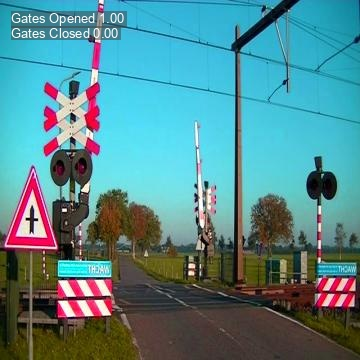

In [9]:
from ultralytics import YOLO
import os
import torch # Import torch to work with tensors if needed
from IPython.display import Image, display # Import Image and display for showing images

# --- 1. Define model path and load the trained classification model ---
# This path points to your trained YOLOv8 classification model.
model_path = "/kaggle/working/yolo_cls_project/railway_classifier/weights/best.pt"

# Load the trained YOLOv8 classification model
try:
    model = YOLO(model_path)
    print(f"✅ Classification model successfully loaded from: {model_path}")
    # Verify the model type if possible (e.g., if it's a classification model)
    if not hasattr(model, 'task') or model.task != 'classify':
        print("⚠️ Warning: The loaded model might not be a classification model.")
        print("         Ensure it was trained with YOLOv8-cls (e.g., yolov8n-cls.pt).")

except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please ensure the model file exists at the specified path and is not corrupted.")
    exit() # Exit if the model cannot be loaded

# --- 2. Define the path to the test image ---
test_image_path = "/kaggle/input/classification-dataset/classification_dataset/Gates Opened/frame0_jpg.rf.69ead747a962c199d698210c8f055026.jpg"

# Check if the image file exists
if not os.path.exists(test_image_path):
    print(f"❌ Error: Test image not found at: {test_image_path}")
    print("Please verify the image path.")
    exit()

# --- 3. Run inference on the test image ---
print(f"\nRunning classification inference on: {test_image_path}")

# For classification models, predict returns a list of Results objects.
# Each Results object for classification will have a 'probs' attribute.
results = model.predict(
    source=test_image_path,
    imgsz=224, # Classification models often expect a specific input size (e.g., 224 for ImageNet-trained models)
               # Adjust this based on your model's training configuration if known.
    save=True, # Ensure images are saved
    # conf=0.25, # Confidence threshold for displaying results (optional, not used for final classification decision)
    # show=False # Set to True to display results in a pop-up window (not supported in Kaggle notebooks)
    name="gate_classification_results" # Custom name for the prediction run folder
)

print("\nClassification inference completed.")

# --- 4. Process and interpret the classification result ---
if results and results[0].probs is not None:
    # Access the probabilities for the first (and only) image
    probs = results[0].probs

    # Get the predicted class ID (index with the highest probability)
    predicted_class_id = probs.top1
    # Get the confidence for the top prediction
    confidence = probs.top1conf.item()

    # Get the class name using the model's names attribute
    predicted_class_name = model.names[predicted_class_id]

    print(f"\n--- Gate Status Prediction for: {os.path.basename(test_image_path)} ---")
    print(f"Predicted Status: {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}")

    # You can add more specific logic here based on your class names
    if "closed" in predicted_class_name.lower():
        print("\nConclusion: The gates are predicted to be CLOSED.")
    elif "opened" in predicted_class_name.lower():
        print("\nConclusion: The gates are predicted to be OPENED.")
    else:
        print("\nConclusion: The gate status could not be definitively determined (based on expected class names).")

    # --- 5. Display the output image ---
    # The 'predict' method saves the original image in its output directory.
    # The 'save_dir' attribute of the result object gives the path to this directory.
    if hasattr(results[0], 'save_dir'):
        output_image_dir = results[0].save_dir
        # The saved image will have the same filename as the input image
        output_image_path = os.path.join(output_image_dir, os.path.basename(test_image_path))

        if os.path.exists(output_image_path):
            print(f"\nDisplaying output image from: {output_image_path}")
            display(Image(filename=output_image_path, width=400)) # Adjust width as needed
        else:
            print(f"❌ Output image not found at: {output_image_path}")
            print("Please check the 'runs/classify' directory in your Kaggle 'Output' tab.")
    else:
        print("\nCould not determine output image save directory.")

else:
    print("\nNo classification probabilities found. Please check the model type and prediction output.")
    print("Ensure the model is indeed a classification model (YOLOv8-cls).")

# Optional: Display all probabilities
# print("\nAll class probabilities:")
# for i, prob in enumerate(probs.data):
#     print(f"  {model.names[i]}: {prob:.4f}")
